In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/shopping-mall-customer-segmentation-data/Shopping Mall Customer Segmentation Data .csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [5]:
df.shape

(15079, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [7]:
# checking null values
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

> **there is no null value in the data**

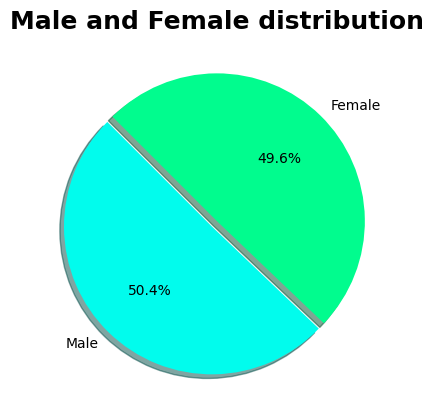

In [8]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels = gender_counts.index, colors = ['#01FCED', '#01FC8E'], explode = [0.05, 0], startangle = 135, shadow = True, autopct= '%1.1f%%')
plt.title('Male and Female distribution', fontsize = 18, fontweight = 'bold')
plt.show()

# Age Groups

In [9]:
bins = [10,20,30,40,50,60,70,80,90,100]
labels  = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age-group'] = pd.cut(df['Age'], bins, labels = labels)

In [10]:
df_age_group_counts = df['age-group'].value_counts()

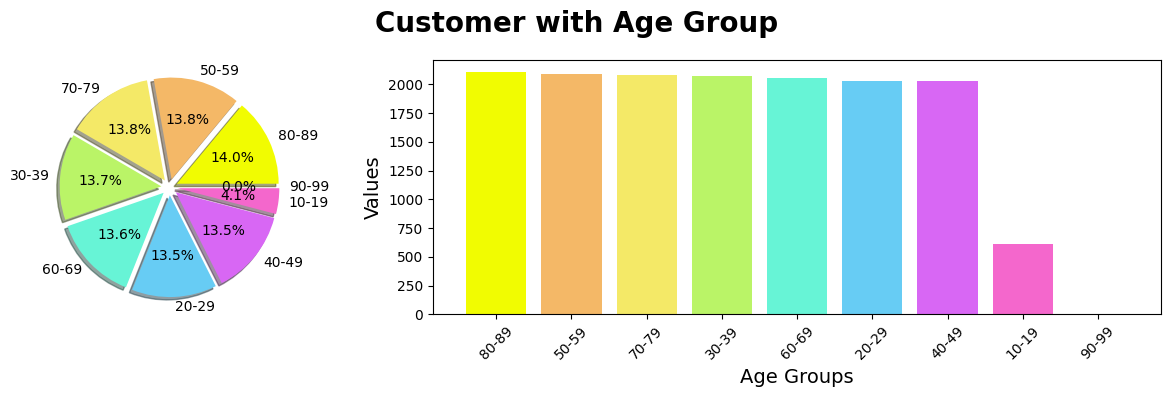

In [11]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 5]})

color_ = ['#F1FC01', '#F4B867', '#F4E967', '#BAF467', '#67F4D6', '#67CCF4', '#D867F4', '#F467CC', '#F46792']
ax[0].pie(x=df_age_group_counts.values, labels=df_age_group_counts.index, explode=[0.08]*9, shadow=True, autopct='%1.1f%%', colors=color_)

x_values = range(len(df_age_group_counts))
y_values = df_age_group_counts.values
ax[1].bar(x_values, y_values, color = color_)
ax[1].set_xticks(x_values)
ax[1].set_xticklabels(df_age_group_counts.index, rotation=45)
ax[1].set_xlabel('Age Groups', fontsize = 14)
ax[1].set_ylabel('Values',fontsize = 14)

plt.suptitle('Customer with Age Group', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

# Spending Score

In [12]:
spending_score_bins = [10,20,30,40,50,60,70,80,90,100]
spending_score_labels  = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['spending-score-group'] = pd.cut(df['Spending Score'], spending_score_bins, labels = spending_score_labels)

In [13]:
df_spending_score_counts = df['spending-score-group'].value_counts()

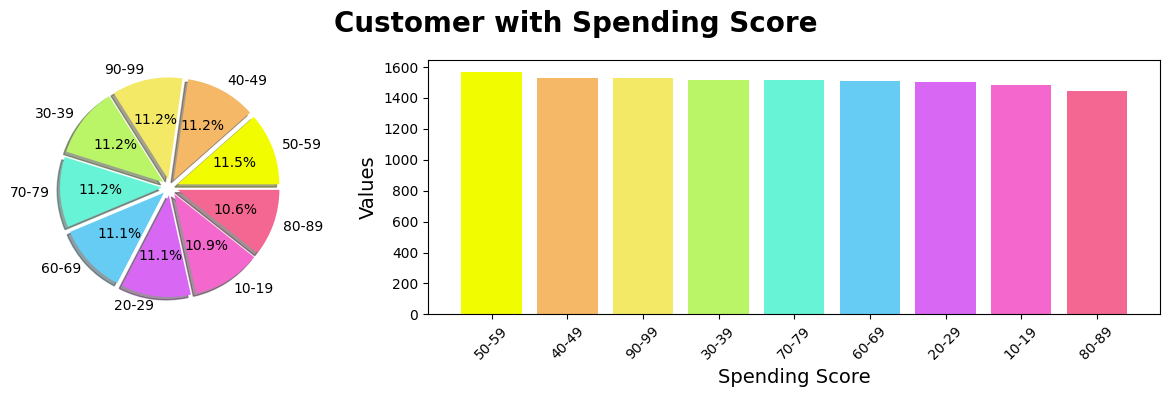

In [14]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 5]})

color_ = ['#F1FC01', '#F4B867', '#F4E967', '#BAF467', '#67F4D6', '#67CCF4', '#D867F4', '#F467CC', '#F46792']
ax[0].pie(x=df_spending_score_counts.values, labels=df_spending_score_counts.index, explode=[0.08]*9, shadow=True, autopct='%1.1f%%', colors=color_)


x_values = range(len(df_spending_score_counts))
y_values = df_spending_score_counts.values
ax[1].bar(x_values, y_values, color = color_)
ax[1].set_xticks(x_values)
ax[1].set_xticklabels(df_spending_score_counts.index, rotation=45)
ax[1].set_xlabel('Spending Score', fontsize = 14)
ax[1].set_ylabel('Values',fontsize = 14)

plt.suptitle('Customer with Spending Score', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [15]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,age-group,spending-score-group
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,20-29,80-89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,50-59,90-99
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,60-69,70-79
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,20-29,50-59
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,20-29,70-79


# Annual Income

In [16]:
spending_score_bins = [20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
spending_score_labels  = ['20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', 
                          '70000-80000', '80000-90000', '90000-100000', '100000-110000','110000-120000',
                          '120000-130000','130000-140000','140000-150000','150000-160000','160000-170000',
                          '170000-180000','180000-190000','190000-200000'
                         ]
df['annual-income-group'] = pd.cut(df['Annual Income'], spending_score_bins, labels = spending_score_labels)

In [17]:
df_annual_income_counts = df['annual-income-group'].value_counts()

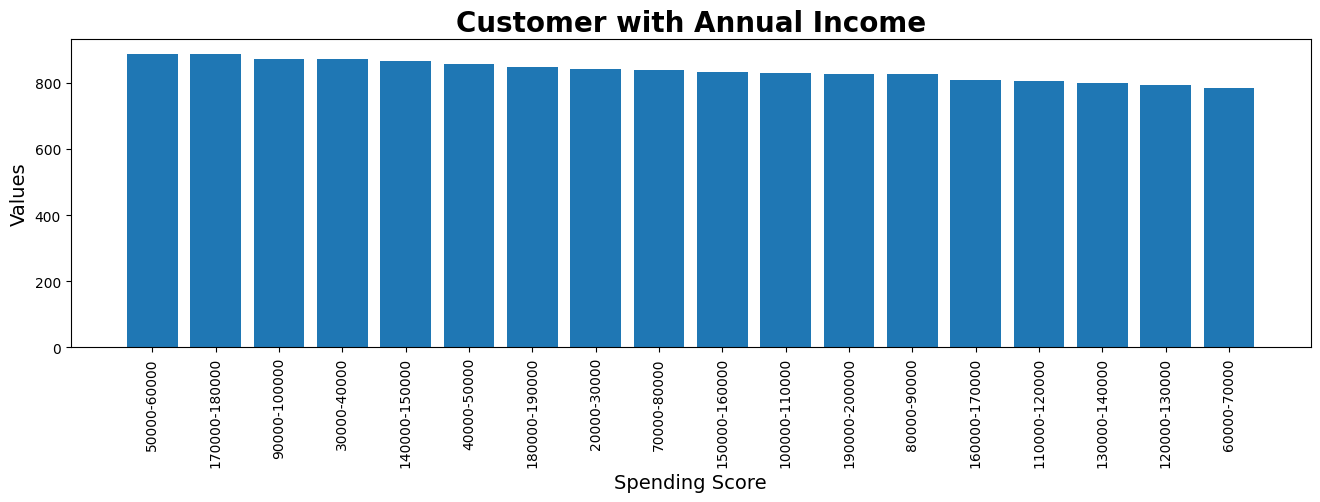

In [18]:
# Customer with Annual Income
plt.figure(figsize = (16,4))
x_values = range(len(df_annual_income_counts))
y_values = df_annual_income_counts.values
plt.bar(x_values, y_values)
plt.xticks(x_values, df_annual_income_counts.index, rotation=90)
# plt.xticklabels(df_annual_income_counts.index, rotation=45)
plt.xlabel('Spending Score', fontsize = 14)
plt.ylabel('Values',fontsize = 14)

plt.title('Customer with Annual Income', fontsize = 20, fontweight = 'bold')
plt.show()

In [19]:
grouped_data = data.groupby(['Age','Gender']).sum()